<a href="https://colab.research.google.com/github/saguileran/MD-SCPI/blob/main/NoteBooks/PyEMMA_COL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyEMMA

In [1]:
%%capture
!pip install pyemma
#!pip install nglview

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pyemma.coordinates as coor
import pyemma
import numpy as np
import matplotlib.pyplot as plt
#import nglview
from matplotlib.colors import to_hex
from itertools import product
import matplotlib as mpl
import random
from google.colab import output
import pandas as pd

In [4]:
def score_cv(data, dim, lag, number_of_splits=10, validation_fraction=0.5):
  with pyemma.util.contexts.settings(show_progress_bars=False):
      nval = int(len(data) * validation_fraction)
      scores = np.zeros(number_of_splits)
      for n in range(number_of_splits):
          ival = np.random.choice(len(data), size=nval, replace=False)
          vamp = pyemma.coordinates.vamp(
              [d for i, d in enumerate(data) if i not in ival], lag=lag, dim=dim)
          scores[n] = vamp.score([d for i, d in enumerate(data) if i in ival])
  return scores

In [5]:
ligand = 'COL'
root = '/content/drive/MyDrive/MolecularDynamics_2023/USP/MC/{}/7000K/'.format(ligand)
pdb = '/content/drive/MyDrive/MolecularDynamics_2023/USP/MC/{}_H.pdb'.format(ligand)
files = [root+str(i)+".nc" for i in range(50)] # random.sample(range(0,50), 10)]
feat = coor.featurizer(pdb)
# just use all xyz-coordinates
feat.add_all()
data = coor.load(files, features=feat)
labels = ['coordinates']  

Obtaining file info:   0%|          | 0/50 [00:00<?, ?it/s]

getting output of FeatureReader:   0%|          | 0/50 [00:00<?, ?it/s]

In [6]:
lagtime = 20
tica = pyemma.coordinates.tica(data, lag=lagtime, dim=10)
tica_output = tica.get_output()
tica_concatenated = np.concatenate(tica_output)

<ipython-input-6-a8751dc6b0fe>:2: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from <ipython-input-6-a8751dc6b0fe> line 2. Use deeptime.decomposition.TICA instead.
  tica = pyemma.coordinates.tica(data, lag=lagtime, dim=10)


calculate covariances:   0%|          | 0/50 [00:00<?, ?it/s]

getting output of TICA:   0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
%%time

fig, (ax, ax_1) = plt.subplots(1,2,figsize=(14,7))

n_clustercenters = [5, 10, 100, 200, 500]
scores = np.zeros((len(n_clustercenters), 5))
for n, k in enumerate(n_clustercenters):
    for m in range(5):
        #with pyemma.util.contexts.settings(show_progress_bars=False):
            _cl = pyemma.coordinates.cluster_kmeans(
                tica_output, k=k, max_iter=50, stride=50)
            _msm = pyemma.msm.estimate_markov_model(_cl.dtrajs, 5)
            scores[n, m] = _msm.score_cv(
                _cl.dtrajs, n=1, score_method='VAMP2', score_k=min(10, k))

lower, upper = pyemma.util.statistics.confidence_interval(scores.T.tolist(), conf=0.9)
ax.fill_between(n_clustercenters, lower, upper, alpha=0.3)
ax.plot(n_clustercenters, np.mean(scores, axis=1), '-o')
ax.semilogx()
ax.set_xlabel('number of cluster centers'); ax.set_ylabel('VAMP-2 score')

lags = [10, 15, 20, 25, 30, 50, 100]
dims = [i + 1 for i in range(10)]

for i, lag in enumerate(lags):
    scores_ = np.array([score_cv(data, dim, lag)
                        for dim in dims])
    scores = np.mean(scores_, axis=1)
    errors = np.std(scores_, axis=1, ddof=1)
    ax_1.fill_between(dims, scores - errors, scores + errors, alpha=0.3, facecolor='C{}'.format(i))
    ax_1.plot(dims, scores, '--o', color='C{}'.format(i), label='lag={:.1f}steps'.format(lag * 1.0))
ax_1.legend()
ax_1.set_xlabel('number of dimensions'); ax_1.set_ylabel('VAMP2 score')

fig.tight_layout()
plt.show()

<timed exec>:8: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from <timed exec> line 8. Use deeptime.clustering.KMeans instead.


initialize kmeans++ centers:   0%|          | 0/5 [00:00<?, ?it/s]

kmeans iterations:   0%|          | 0/50 [00:00<?, ?it/s]

getting output of KmeansClustering:   0%|          | 0/50 [00:00<?, ?it/s]

<timed exec>:8: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from <timed exec> line 8. Use deeptime.clustering.KMeans instead.


initialize kmeans++ centers:   0%|          | 0/5 [00:00<?, ?it/s]

kmeans iterations:   0%|          | 0/50 [00:00<?, ?it/s]

getting output of KmeansClustering:   0%|          | 0/50 [00:00<?, ?it/s]

<timed exec>:8: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from <timed exec> line 8. Use deeptime.clustering.KMeans instead.


initialize kmeans++ centers:   0%|          | 0/5 [00:00<?, ?it/s]

kmeans iterations:   0%|          | 0/50 [00:00<?, ?it/s]

getting output of KmeansClustering:   0%|          | 0/50 [00:00<?, ?it/s]

<timed exec>:8: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from <timed exec> line 8. Use deeptime.clustering.KMeans instead.


initialize kmeans++ centers:   0%|          | 0/5 [00:00<?, ?it/s]

kmeans iterations:   0%|          | 0/50 [00:00<?, ?it/s]

getting output of KmeansClustering:   0%|          | 0/50 [00:00<?, ?it/s]

<timed exec>:8: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from <timed exec> line 8. Use deeptime.clustering.KMeans instead.


initialize kmeans++ centers:   0%|          | 0/5 [00:00<?, ?it/s]

kmeans iterations:   0%|          | 0/50 [00:00<?, ?it/s]

getting output of KmeansClustering:   0%|          | 0/50 [00:00<?, ?it/s]

<timed exec>:8: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from <timed exec> line 8. Use deeptime.clustering.KMeans instead.


initialize kmeans++ centers:   0%|          | 0/10 [00:00<?, ?it/s]

kmeans iterations:   0%|          | 0/50 [00:00<?, ?it/s]

getting output of KmeansClustering:   0%|          | 0/50 [00:00<?, ?it/s]

<timed exec>:8: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from <timed exec> line 8. Use deeptime.clustering.KMeans instead.


initialize kmeans++ centers:   0%|          | 0/10 [00:00<?, ?it/s]

kmeans iterations:   0%|          | 0/50 [00:00<?, ?it/s]

getting output of KmeansClustering:   0%|          | 0/50 [00:00<?, ?it/s]

<timed exec>:8: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from <timed exec> line 8. Use deeptime.clustering.KMeans instead.


initialize kmeans++ centers:   0%|          | 0/10 [00:00<?, ?it/s]

kmeans iterations:   0%|          | 0/50 [00:00<?, ?it/s]

getting output of KmeansClustering:   0%|          | 0/50 [00:00<?, ?it/s]

<timed exec>:8: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from <timed exec> line 8. Use deeptime.clustering.KMeans instead.


initialize kmeans++ centers:   0%|          | 0/10 [00:00<?, ?it/s]

kmeans iterations:   0%|          | 0/50 [00:00<?, ?it/s]

getting output of KmeansClustering:   0%|          | 0/50 [00:00<?, ?it/s]

<timed exec>:8: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from <timed exec> line 8. Use deeptime.clustering.KMeans instead.


initialize kmeans++ centers:   0%|          | 0/10 [00:00<?, ?it/s]

kmeans iterations:   0%|          | 0/50 [00:00<?, ?it/s]

getting output of KmeansClustering:   0%|          | 0/50 [00:00<?, ?it/s]

<timed exec>:8: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from <timed exec> line 8. Use deeptime.clustering.KMeans instead.


initialize kmeans++ centers:   0%|          | 0/100 [00:00<?, ?it/s]

kmeans iterations:   0%|          | 0/50 [00:00<?, ?it/s]

10-04-23 03:00:27 pyemma.coordinates.clustering.kmeans.KmeansClustering[44] WARNING  Algorithm did not reach convergence criterion of 1e-05 in 50 iterations. Consider increasing max_iter.


/usr/local/lib/python3.9/dist-packages/deeptime/clustering/_kmeans.py:466: UserWarning: Algorithm did not reach convergence criterion of 1e-05 in 50 iterations. Consider increasing max_iter.
  warnings.warn(f"Algorithm did not reach convergence criterion"


getting output of KmeansClustering:   0%|          | 0/50 [00:00<?, ?it/s]

<timed exec>:8: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from <timed exec> line 8. Use deeptime.clustering.KMeans instead.


initialize kmeans++ centers:   0%|          | 0/100 [00:00<?, ?it/s]

kmeans iterations:   0%|          | 0/50 [00:00<?, ?it/s]

getting output of KmeansClustering:   0%|          | 0/50 [00:00<?, ?it/s]

<timed exec>:8: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from <timed exec> line 8. Use deeptime.clustering.KMeans instead.


initialize kmeans++ centers:   0%|          | 0/100 [00:00<?, ?it/s]

kmeans iterations:   0%|          | 0/50 [00:00<?, ?it/s]

getting output of KmeansClustering:   0%|          | 0/50 [00:00<?, ?it/s]

<timed exec>:8: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from <timed exec> line 8. Use deeptime.clustering.KMeans instead.


initialize kmeans++ centers:   0%|          | 0/100 [00:00<?, ?it/s]

kmeans iterations:   0%|          | 0/50 [00:00<?, ?it/s]

getting output of KmeansClustering:   0%|          | 0/50 [00:00<?, ?it/s]

<timed exec>:8: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from <timed exec> line 8. Use deeptime.clustering.KMeans instead.


initialize kmeans++ centers:   0%|          | 0/100 [00:00<?, ?it/s]

kmeans iterations:   0%|          | 0/50 [00:00<?, ?it/s]

getting output of KmeansClustering:   0%|          | 0/50 [00:00<?, ?it/s]

<timed exec>:8: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from <timed exec> line 8. Use deeptime.clustering.KMeans instead.


initialize kmeans++ centers:   0%|          | 0/200 [00:00<?, ?it/s]

kmeans iterations:   0%|          | 0/50 [00:00<?, ?it/s]

getting output of KmeansClustering:   0%|          | 0/50 [00:00<?, ?it/s]

<timed exec>:8: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from <timed exec> line 8. Use deeptime.clustering.KMeans instead.


initialize kmeans++ centers:   0%|          | 0/200 [00:00<?, ?it/s]

kmeans iterations:   0%|          | 0/50 [00:00<?, ?it/s]

getting output of KmeansClustering:   0%|          | 0/50 [00:00<?, ?it/s]

<timed exec>:8: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from <timed exec> line 8. Use deeptime.clustering.KMeans instead.


initialize kmeans++ centers:   0%|          | 0/200 [00:00<?, ?it/s]

kmeans iterations:   0%|          | 0/50 [00:00<?, ?it/s]

getting output of KmeansClustering:   0%|          | 0/50 [00:00<?, ?it/s]

<timed exec>:8: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from <timed exec> line 8. Use deeptime.clustering.KMeans instead.


initialize kmeans++ centers:   0%|          | 0/200 [00:00<?, ?it/s]

kmeans iterations:   0%|          | 0/50 [00:00<?, ?it/s]

getting output of KmeansClustering:   0%|          | 0/50 [00:00<?, ?it/s]

<timed exec>:8: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from <timed exec> line 8. Use deeptime.clustering.KMeans instead.


initialize kmeans++ centers:   0%|          | 0/200 [00:00<?, ?it/s]

kmeans iterations:   0%|          | 0/50 [00:00<?, ?it/s]

getting output of KmeansClustering:   0%|          | 0/50 [00:00<?, ?it/s]

<timed exec>:8: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from <timed exec> line 8. Use deeptime.clustering.KMeans instead.


initialize kmeans++ centers:   0%|          | 0/500 [00:00<?, ?it/s]

kmeans iterations:   0%|          | 0/50 [00:00<?, ?it/s]

getting output of KmeansClustering:   0%|          | 0/50 [00:00<?, ?it/s]

<timed exec>:8: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from <timed exec> line 8. Use deeptime.clustering.KMeans instead.


initialize kmeans++ centers:   0%|          | 0/500 [00:00<?, ?it/s]

kmeans iterations:   0%|          | 0/50 [00:00<?, ?it/s]

getting output of KmeansClustering:   0%|          | 0/50 [00:00<?, ?it/s]

<timed exec>:8: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from <timed exec> line 8. Use deeptime.clustering.KMeans instead.


initialize kmeans++ centers:   0%|          | 0/500 [00:00<?, ?it/s]

kmeans iterations:   0%|          | 0/50 [00:00<?, ?it/s]

getting output of KmeansClustering:   0%|          | 0/50 [00:00<?, ?it/s]

<timed exec>:8: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from <timed exec> line 8. Use deeptime.clustering.KMeans instead.


initialize kmeans++ centers:   0%|          | 0/500 [00:00<?, ?it/s]

kmeans iterations:   0%|          | 0/50 [00:00<?, ?it/s]

getting output of KmeansClustering:   0%|          | 0/50 [00:00<?, ?it/s]

<timed exec>:8: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from <timed exec> line 8. Use deeptime.clustering.KMeans instead.


initialize kmeans++ centers:   0%|          | 0/500 [00:00<?, ?it/s]

kmeans iterations:   0%|          | 0/50 [00:00<?, ?it/s]

getting output of KmeansClustering:   0%|          | 0/50 [00:00<?, ?it/s]

<timed exec>:8: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from <timed exec> line 8. Use deeptime.clustering.KMeans instead.


initialize kmeans++ centers:   0%|          | 0/1000 [00:00<?, ?it/s]

kmeans iterations:   0%|          | 0/50 [00:00<?, ?it/s]

getting output of KmeansClustering:   0%|          | 0/50 [00:00<?, ?it/s]

<timed exec>:8: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from <timed exec> line 8. Use deeptime.clustering.KMeans instead.


initialize kmeans++ centers:   0%|          | 0/1000 [00:00<?, ?it/s]

kmeans iterations:   0%|          | 0/50 [00:00<?, ?it/s]

getting output of KmeansClustering:   0%|          | 0/50 [00:00<?, ?it/s]

<timed exec>:8: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from <timed exec> line 8. Use deeptime.clustering.KMeans instead.


initialize kmeans++ centers:   0%|          | 0/1000 [00:00<?, ?it/s]

kmeans iterations:   0%|          | 0/50 [00:00<?, ?it/s]

getting output of KmeansClustering:   0%|          | 0/50 [00:00<?, ?it/s]

<timed exec>:8: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from <timed exec> line 8. Use deeptime.clustering.KMeans instead.


initialize kmeans++ centers:   0%|          | 0/1000 [00:00<?, ?it/s]

kmeans iterations:   0%|          | 0/50 [00:00<?, ?it/s]

getting output of KmeansClustering:   0%|          | 0/50 [00:00<?, ?it/s]

<timed exec>:8: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from <timed exec> line 8. Use deeptime.clustering.KMeans instead.


initialize kmeans++ centers:   0%|          | 0/1000 [00:00<?, ?it/s]

kmeans iterations:   0%|          | 0/50 [00:00<?, ?it/s]

getting output of KmeansClustering:   0%|          | 0/50 [00:00<?, ?it/s]

<ipython-input-6-c1b7719e949b>:7: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from <ipython-input-6-c1b7719e949b> line 7. Use deeptime.decomposition.VAMP instead.
  vamp = pyemma.coordinates.vamp(
<ipython-input-6-c1b7719e949b>:7: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from <ipython-input-6-c1b7719e949b> line 7. Use deeptime.decomposition.VAMP instead.
  vamp = pyemma.coordinates.vamp(
<ipython-input-6-c1b7719e949b>:7: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from <ipython-input-6-c1b7719e949b> line 7. Use deeptime.decomposition.VAMP instead.
  vamp = pyemma.coordinates.vamp(
<ipython-input-6-c1b7719e949b>:7: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from <ipython-input-6-c1b7719e949b> line 7. Use deeptime.decomposition.VAMP instead.
  vamp = pyemma.coordinates.vamp(
<ipython-input-6-c1b7719e949b>:7: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from

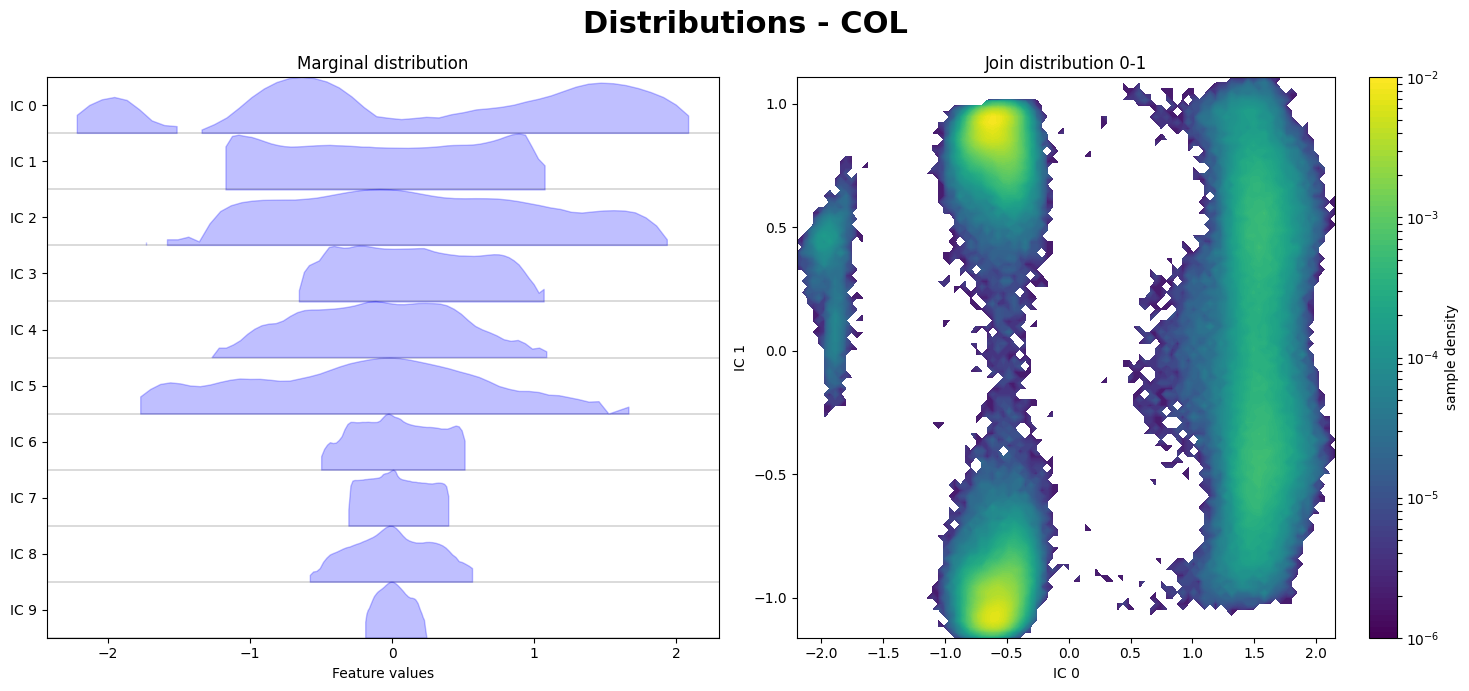

In [7]:
#@title marginal and joint distributions
c1, c2 = 0, 1  # choose ICs

plt.close()
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
pyemma.plots.plot_feature_histograms( tica_concatenated,
                                      ax=axes[0],
                                      feature_labels=["IC {}".format(i) for i in range(tica_concatenated.shape[1])],
                                      ylog=True )

pyemma.plots.plot_density(*tica_concatenated[:, [c1,c2]].T, ax=axes[1], logscale=True)

axes[0].set_title('Marginal distribution')
axes[1].set_xlabel('IC {}'.format(c1)); axes[1].set_ylabel('IC {}'.format(c2))
axes[1].set_title('Join distribution {}-{}'.format(c1,c2))
plt.suptitle('Distributions - '+ligand, fontweight='bold', fontsize='22')
fig.tight_layout()

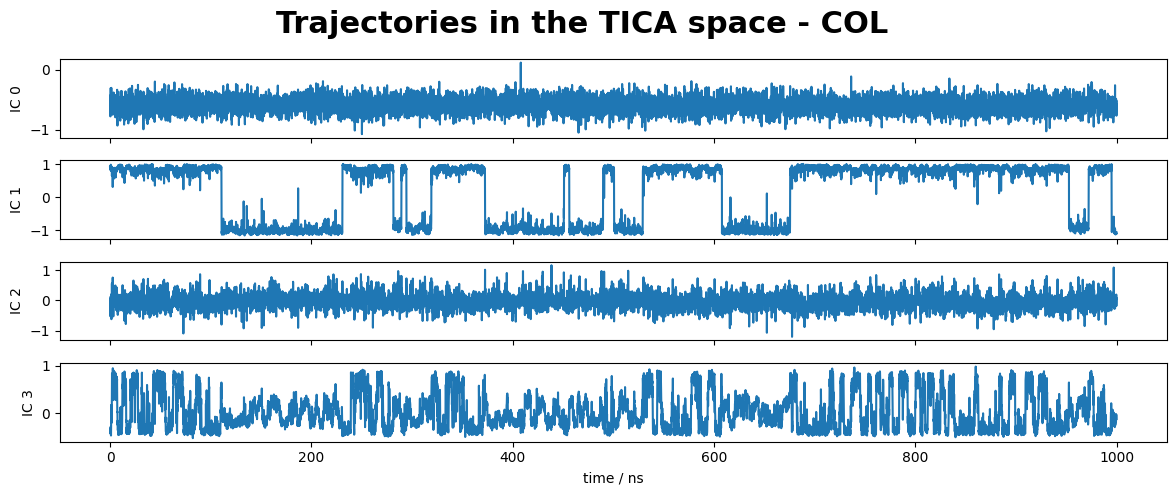

In [8]:
#@title TICA space
plt.close()
fig, axes = plt.subplots(4, 1, figsize=(12, 5), sharex=True)
x = 0.1 * np.arange(tica_output[0].shape[0])
for i, (ax, tic) in enumerate(zip(axes.flat, tica_output[0].T)):
    ax.plot(x, tic)
    ax.set_ylabel('IC {}'.format(i))
axes[-1].set_xlabel('time / ns')
plt.suptitle('Trajectories in the TICA space - '+ligand, fontweight='bold', fontsize='22')
fig.tight_layout()

In [ ]:
#@title Clusters
plt.close()
cluster = pyemma.coordinates.cluster_kmeans(tica_output, k=500, max_iter=200, stride=1, fixed_seed=1)
dtrajs_concatenated = np.concatenate(cluster.dtrajs)

fig, ax = plt.subplots(figsize=(6, 6))
pyemma.plots.plot_density(*tica_concatenated[:, [c1,c2]].T, ax=ax, cbar=False, alpha=0.3)
ax.scatter(*cluster.clustercenters[:, [c1,c2]].T, s=5, c='C1')
ax.set_xlabel('IC '+str(c1)); ax.set_ylabel('IC '+str(c2))
plt.title('Cluster kmeans - '+ligand, fontsize='22', fontweight='bold')

fig.tight_layout()

<ipython-input-9-9c72ce9cf40a>:3: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from <ipython-input-9-9c72ce9cf40a> line 3. Use deeptime.clustering.KMeans instead.
  cluster = pyemma.coordinates.cluster_kmeans(tica_output, k=500, max_iter=200, stride=1, fixed_seed=1)


initialize kmeans++ centers:   0%|          | 0/500 [00:00<?, ?it/s]

kmeans iterations:   0%|          | 0/200 [00:00<?, ?it/s]

In [ ]:
# its = pyemma.msm.its(cluster.dtrajs, lags=20, nits=10, errors='bayes')
# pyemma.plots.plot_implied_timescales(its, units='ns', dt=1.0);

In [ ]:
msm = pyemma.msm.bayesian_markov_model(cluster.dtrajs, lag=lagtime, dt_traj='1.0 ns')
print('fraction of states used = {:.2f}'.format(msm.active_state_fraction))
print('fraction of counts used = {:.2f}'.format(msm.active_count_fraction))

In [ ]:
#@title Chapman-Kolmogorov test
nstates = 4
plt.close()
cktest = msm.cktest(nstates, mlags=10)
pyemma.plots.plot_cktest(cktest, dt=1.0, units='steps');

In [ ]:
#@title MSM Spectral Analysis
def its_separation_err(ts, ts_err):
    """
    Error propagation from ITS standard deviation to timescale separation.
    """
    return ts[:-1] / ts[1:] * np.sqrt(
        (ts_err[:-1] / ts[:-1])**2 + (ts_err[1:] / ts[1:])**2)


nits = 15
plt.close()

timescales_mean = msm.sample_mean('timescales', k=nits)
timescales_std = msm.sample_std('timescales', k=nits)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].errorbar( range(1, nits + 1),
                  timescales_mean,
                  yerr=timescales_std,
                  fmt='.', markersize=10 )
axes[1].errorbar( range(1, nits),
                  timescales_mean[:-1] / timescales_mean[1:],
                  yerr=its_separation_err(timescales_mean, timescales_std),
                  fmt='.',
                  markersize=10,
                  color='C0' )

for i, ax in enumerate(axes):
    ax.set_xticks(range(1, nits + 1))
    ax.grid(True, axis='x', linestyle=':')

axes[0].axhline(msm.lag * 0.1, lw=1.5, color='k')
axes[0].axhspan(0, msm.lag * 0.1, alpha=0.3, color='k')
axes[0].set_xlabel('implied timescale index')
axes[0].set_ylabel('implied timescales / ns')
axes[1].set_xticks(range(1, nits))
#axes[1].set_xticklabels(["{:d}/{:d}".format(k, k + 1) for k in range(1, nits + 2)], rotation=45)
axes[1].set_xlabel('implied timescale indices')
axes[1].set_ylabel('timescale separation')
plt.suptitle('MSM Spectral Analysis - '+ligand, fontweight='bold', fontsize='22')
fig.tight_layout()

In [ ]:
#@title Stationary Distribution and Free Energy 
plt.close()
fig, axes = plt.subplots(1, 2, figsize=(15, 7), sharex=True, sharey=True)
pyemma.plots.plot_contour( *tica_concatenated[:, [c1,c2]].T,
                            msm.pi[np.concatenate(msm.dtrajs_active)],
                            ax=axes[0],
                            mask=True,
                            cbar_label='stationary distribution' )
pyemma.plots.plot_free_energy( *tica_concatenated[:, [c1,c2]].T,
                               weights=np.concatenate(msm.trajectory_weights()),
                               ax=axes[1],
                               legacy=False )

for ax in axes.flat: ax.set_xlabel('IC'+str(c1))

axes[0].set_ylabel('IC'+str(c2))
axes[0].set_title('Stationary distribution', fontsize='18')
axes[1].set_title('Reweighted Free Energy Surface - '+ligand, fontsize='18')
fig.tight_layout()

In [ ]:
#@title Eigenvectors
plt.close()
eigvec = msm.eigenvectors_right()
print('The first eigenvector is one: {} (min={}, max={})'.format(
    np.allclose(eigvec[:, 0], 1, atol=1e-15), eigvec[:, 0].min(), eigvec[:, 0].max()))

fig, axes = plt.subplots(1, 4, figsize=(18, 5), sharex=True, sharey=True)
for i, ax in enumerate(axes.flat):
    pyemma.plots.plot_contour(*tica_concatenated[:, [c1,c2]].T,
                              eigvec[np.concatenate(msm.dtrajs_active), i + 1],
                              ax=ax,
                              cmap='PiYG',
                              cbar_label='{}. right eigenvector'.format(i + 2),
                              mask=True)
    ax.set_xlabel('IC '+str(c1))

axes[0].set_ylabel('IC '+str(c2))
plt.suptitle('Eigenvalues - '+ligand, fontweight='bold', fontsize='22')
fig.tight_layout()

In [ ]:
#@title PCCA - Metastable Distributions

plt.close()
msm.pcca(nstates)

fig, axes = plt.subplots(1, nstates, figsize=(18, 5), sharex=True, sharey=True)
for i, ax in enumerate(axes.flat):
    pyemma.plots.plot_contour(*tica_concatenated[:, :2].T,
                              msm.metastable_distributions[i][np.concatenate(msm.dtrajs_active)],
                              ax=ax,
                              cmap='afmhot_r',
                              mask=True,
                              cbar_label='metastable distribution {}'.format(i + 1))
    ax.set_xlabel('IC '+str(c1))
axes[0].set_ylabel('IC '+str(c2))
plt.suptitle('PCCA - Metastable Distributions - '+ligand, fontweight='bold', fontsize='22')
fig.tight_layout()

In [ ]:
#@title States
plt.close()
metastable_traj = msm.metastable_assignments[np.concatenate(msm.dtrajs_active)]

fig, ax = plt.subplots(figsize=(7, 6))
_, _, misc = pyemma.plots.plot_state_map(
    *tica_concatenated[:, :2].T, metastable_traj, ax=ax)
ax.set_xlabel('IC '+str(c1))
ax.set_ylabel('IC '+str(c2))
misc['cbar'].set_ticklabels([r'$\mathcal{S}_%d$' % (i + 1)
                             for i in range(nstates)])
plt.title('States - '+ligand, fontweight='bold', fontsize='22')
fig.tight_layout()

In [ ]:
#@title PDBs Example
pcca_samples = msm.sample_by_distributions(msm.metastable_distributions, 10)
torsions_source = pyemma.coordinates.source(files, features=feat)
pyemma.coordinates.save_trajs(torsions_source, pcca_samples,
                              outfiles=['./pcca-{}-{}_10samples.pdb'.format(ligand, n+1) for n in range(msm.n_metastable)])

In [ ]:
# #@title Examples Visualization
# def visualize_metastable(samples, cmap, selection='not element H'):
#     """ visualize metastable states
#     Parameters
#     ----------
#     samples: list of mdtraj.Trajectory objects
#         each element contains all samples for one metastable state.
#     cmap: matplotlib.colors.ListedColormap
#         color map used to visualize metastable states before.
#     selection: str
#         which part of the molecule to selection for visualization. For details have a look here:
#         http://mdtraj.org/latest/examples/atom-selection.html#Atom-Selection-Language
#     """

#     widget = nglview.NGLWidget()
#     widget.clear_representations()
#     ref = samples[0]
#     for i, s in enumerate(samples):
#         s = s.superpose(ref, atom_indices=s.top.select('resid 0'))
#         s = s.atom_slice(s.top.select(selection))
#         comp = widget.add_trajectory(s)
#         comp.add_licorice()

#     # this has to be done in a separate loop for whatever reason...
#     x = np.linspace(0, 1, num=len(samples))
#     for i, x_ in enumerate(x):
#         c = to_hex(cmap(x_))
#         widget.update_licorice(color=c, component=i, repr_index=i)
#         widget.remove_cartoon(component=i)
#     return widget

# output.enable_custom_widget_manager()
# my_samples = [pyemma.coordinates.save_traj(files, idist, outfile=None, top=pdb)
#               for idist in msm.sample_by_distributions(msm.metastable_distributions, 50)]

# cmap = mpl.colormaps['viridis']#, nstates)
# visualize_metastable(my_samples, cmap)

In [ ]:
#output.disable_custom_widget_manager()

In [ ]:
#@title π and G/kT 
print('state\tπ\t\tG/kT')
for i, s in enumerate(msm.metastable_sets):
    p = msm.pi[s].sum()
    print('{}\t{:f}\t{:f}'.format(i + 1, p, -np.log(p)))

In [ ]:
#@title MFPT
mfpt = np.zeros((nstates, nstates))
for i, j in product(range(nstates), repeat=2):
    mfpt[i, j] = msm.mfpt(
        msm.metastable_sets[i],
        msm.metastable_sets[j])

from pandas import DataFrame
print('MFPT / LiBELa steps:')
DataFrame(np.round(mfpt, decimals=2), index=range(1, nstates + 1), columns=range(1, nstates + 1))

In [ ]:
A = msm.metastable_sets[0]
B = np.concatenate(msm.metastable_sets[1:])
print('MFPT 1 -> other: ({:6.1f} ± {:5.1f}) LiBELa steps'.format(
    msm.sample_mean('mfpt', A, B), msm.sample_std('mfpt', A, B)))
print('MFPT other -> 1: ({:.1f} ± {:5.1f}) LiBELa steps'.format(
    msm.sample_mean('mfpt', B, A), msm.sample_std('mfpt', B, A)))

In [ ]:
#@title Coarse Grain Between States
start, final = 0, 2
A, B = msm.metastable_sets[start], msm.metastable_sets[final]
flux = pyemma.msm.tpt(msm, A, B)

cg, cgflux = flux.coarse_grain(msm.metastable_sets)

In [ ]:
hmm = msm.coarse_grain(nstates)
hmm.stationary_distribution

In [ ]:
pd.DataFrame(hmm.transition_matrix)

In [ ]:
pos=np.array([[0, 0], [-2, -2], [2, -2]])
pyemma.plots.plot_markov_model(hmm, pos=pos, arrow_label_format='%.1E', state_colors=['indigo','teal','yellow'], state_labels=['1','2','3'], 
                              fontweight='bold', size='11', arrow_curvature=1.5)
plt.title('HMM Network Plot - Transition Probabilities - AS4', fontweight='bold', fontsize='18')
plt.gca().set_frame_on(False)

In [ ]:
# #@title Transition Path Theory
# fig, ax = plt.subplots(figsize=(7, 6))

# pyemma.plots.plot_contour(*tica_concatenated[:, [c1,c2]].T,
#                           flux.committor[dtrajs_concatenated],
#                           cmap='brg',
#                           ax=ax,
#                           mask=True,
#                           cbar_label=r'committor $\mathcal{S}_%d \to \mathcal{S}_%d$' % (
#                               start + 1, final + 1))
# plt.title('Transition Path Theory - '+ligand, fontweight='bold', fontsize='22')
# fig.tight_layout()

In [ ]:
#@title Transition Path Theory
fig, axes = plt.subplots(1,3, figsize=(18, 6))

# --------- 1->2, 1->3 ----------
for i in range(1,nstates):
  flux = pyemma.msm.tpt(msm, msm.metastable_sets[0], msm.metastable_sets[i])
  cg, cgflux = flux.coarse_grain(msm.metastable_sets)
  pyemma.plots.plot_contour(*tica_concatenated[:, [c1,c2]].T, flux.committor[dtrajs_concatenated], cmap='brg', ax=axes[i-1], mask=True,
                            cbar_label=r'committor $\mathcal{S}_%d \to \mathcal{S}_%d$' % (0 + 1, i + 1))
# --------- 2->3 ----------
flux = pyemma.msm.tpt(msm, msm.metastable_sets[1], msm.metastable_sets[2])
cg, cgflux = flux.coarse_grain(msm.metastable_sets)
pyemma.plots.plot_contour(*tica_concatenated[:, [c1,c2]].T, flux.committor[dtrajs_concatenated], cmap='brg', ax=axes[2], mask=True,
                          cbar_label=r'committor $\mathcal{S}_%d \to \mathcal{S}_%d$' % (1 + 1, 2 + 1))

plt.suptitle('Transition Path Theory - '+ligand, fontweight='bold', fontsize='22')
fig.tight_layout()